In [3]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
#test

In [4]:
data=pd.read_csv('prepped_data.csv')
data

,Unnamed: 0,id,created_at,updated_at,name,description,status,gsf_standards_version,estimated_annual_credits,crediting_period_start_date,...,continent_code_AF,continent_code_AS,continent_code_EU,continent_code_NA,continent_code_OC,continent_code_SA,continent_code_XZ,size_Large Scale,size_Micro Scale,size_Small Scale
0,0,1001,2019-03-27 13:52:28+00:00,2022-01-20 06:04:23+00:00,"Prony and Kafeate wind-farms, New Caledonia (3...",The project activity involves six wind farms l...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,36339,2008-04-20,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1,1002,2019-03-27 13:52:28+00:00,2022-11-17 01:11:15+00:00,Amayo 40 MW Wind Power Project – Nicaragua,The main objective of the Amayo Wind Power Pro...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,120811,2021-04-12,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,1003,2019-03-27 13:52:28+00:00,2022-06-08 04:14:19+00:00,Renewable Energy Power project by DDWL,The main purpose of this project activity is t...,GOLD_STANDARD_CERTIFIED_PROJECT,Gold Standard for the Global Goals,58947,2020-10-07,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,1007,2019-03-27 13:52:28+00:00,2022-07-14 12:23:24+00:00,"Cataltepe 16MW Wind Farm Project, Turkey","The Cataltepe 16 MW Wind Farm Project, Turkey,...",GOLD_STANDARD_CERTIFIED_PROJECT,v1 CASH,39724,2011-04-19,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,1009,2019-03-27 13:52:29+00:00,2022-12-14 02:28:59+00:00,"Kuyucak 25.6 MW Wind Farm Project, Turkey","The Kuyucak 25,6 MW Wind Farm Project, Turkey,...",GOLD_STANDARD_CERTIFIED_PROJECT,v1 CASH,71578,2017-11-11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357,1357,992,2019-03-27 13:52:26+00:00,2022-01-05 12:27:23+00:00,GS4424 VPA2 African Cookstoves and Water Prorg...,The Micro-Scale Voluntary Project Activity 2 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9719,2015-12-12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1358,1358,993,2019-03-27 13:52:26+00:00,2022-01-05 12:32:11+00:00,GS4424 VPA3 African Cookstoves and Water Progr...,The Micro-Scale Voluntary Project Activity 3 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9719,2015-12-12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1359,1359,994,2019-03-27 13:52:26+00:00,2022-01-05 12:39:55+00:00,GS4424 VPA4 African Cookstoves and Water Progr...,The Micro-Scale Voluntary Project Activity 4 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9719,2015-12-12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1360,1360,995,2019-03-27 13:52:27+00:00,2022-01-05 12:42:50+00:00,GS4424 VPA5 African Cookstoves and Water Progr...,The Micro-Scale Voluntary Project Activity 5 A...,GOLD_STANDARD_CERTIFIED_PROJECT,v2.2 CASH,9179,2015-12-12,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'VER Percentage Credits Sold')

<Figure size 576x288 with 0 Axes>

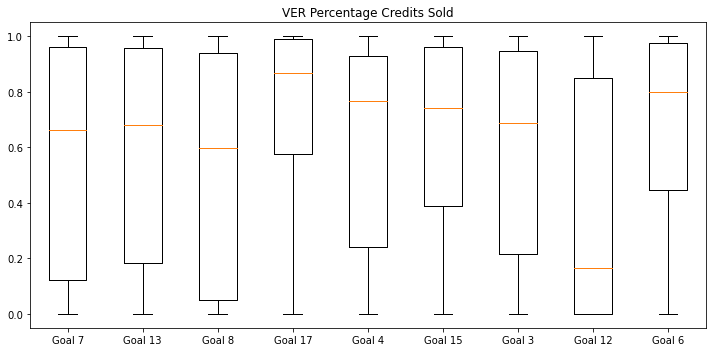

In [6]:
#Goals 6 and 17 seem to be the most popular
plt.figure(figsize=[8,4])
fig, ax = plt.subplots(figsize=(10,5),layout='tight')
goals_sales={}
for i in range(0,9):
    colname=data.columns[25+i]
    colname=colname.split(':',1)[0]
    goals_sales[colname]=list(data[data.iloc[:,25+i]==True]['VER_percentage_sold'].dropna())
ax.boxplot(goals_sales.values())
ax.set_xticklabels(goals_sales.keys())
plt.title('VER Percentage Credits Sold')

c:\Users\SamRo\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\SamRo\AppData\Local\Temp\ipykernel_2612\1299537685.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


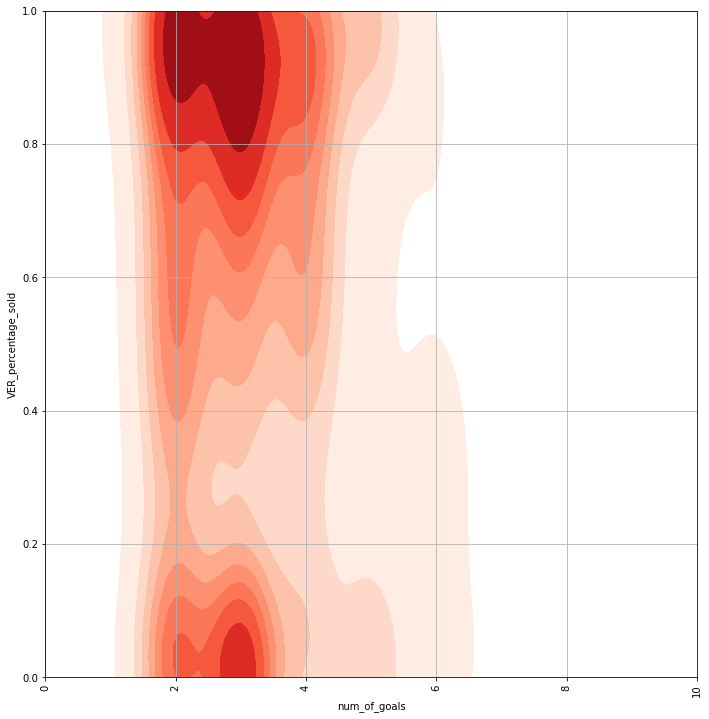

In [7]:
#there doesnt seem to be an obvious relationship between the number of goals and percentage sold
plt.figure(figsize=(10,10))
sns.kdeplot(data=data,x='num_of_goals',y='VER_percentage_sold',color='r', shade=True,cmap="Reds", shade_lowest=False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.grid(b=None)
plt.ylim([0,1])
plt.xlim([0,10])
plt.show()

c:\Users\SamRo\anaconda3\lib\site-packages\seaborn\distributions.py:1718: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\SamRo\AppData\Local\Temp\ipykernel_2612\386858680.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


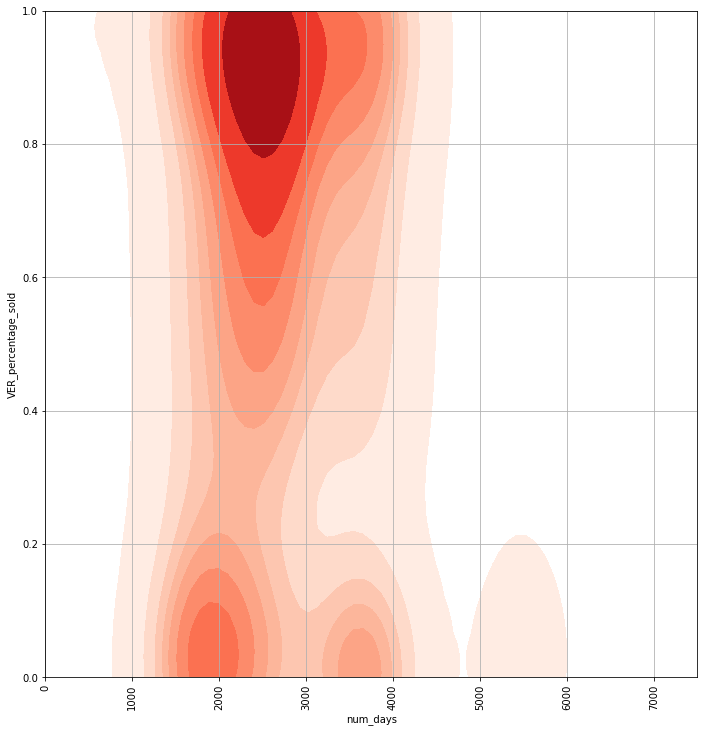

In [8]:
#there is suprisingly little correlation between the crediting period and the percentage sold
plt.figure(figsize=(10,10))
sns.kdeplot(data=data,x='num_days',y='VER_percentage_sold',color='r', shade=True,cmap="Reds", shade_lowest=False)
plt.tight_layout()
plt.xticks(rotation=90)
plt.grid(b=None)
plt.ylim([0,1])
plt.xlim([0,7500])
plt.show()

C:\Users\SamRo\AppData\Local\Temp\ipykernel_2612\1301158397.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


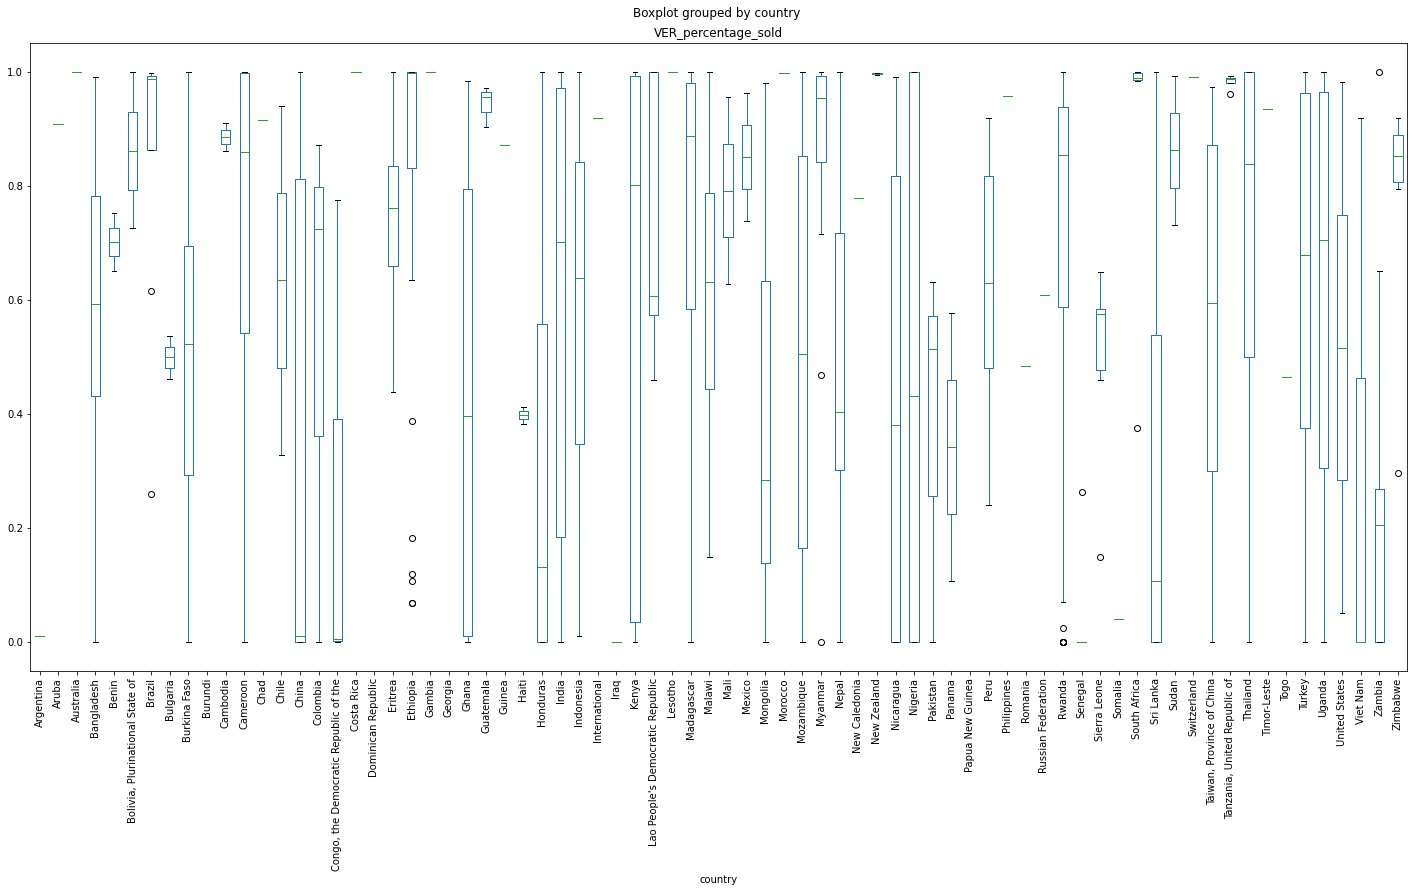

In [9]:
data.boxplot('VER_percentage_sold',by='country',figsize=(20,10))
plt.tight_layout()
plt.xticks(rotation=90)
plt.grid(b=None)
plt.show()

C:\Users\SamRo\AppData\Local\Temp\ipykernel_2612\629946703.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


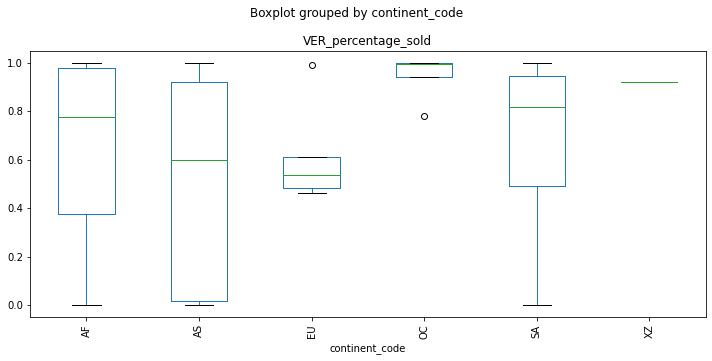

In [10]:
#projects in europe seem to have a lower change of selling than otheres
#oceania and international waters have very high number, but we do not have many projects in these regions to make concrete analysis of this
data.boxplot('VER_percentage_sold',by='continent_code',figsize=(10,5))
plt.tight_layout()
plt.xticks(rotation=90)
plt.grid(b=None)
plt.show()

<AxesSubplot:>

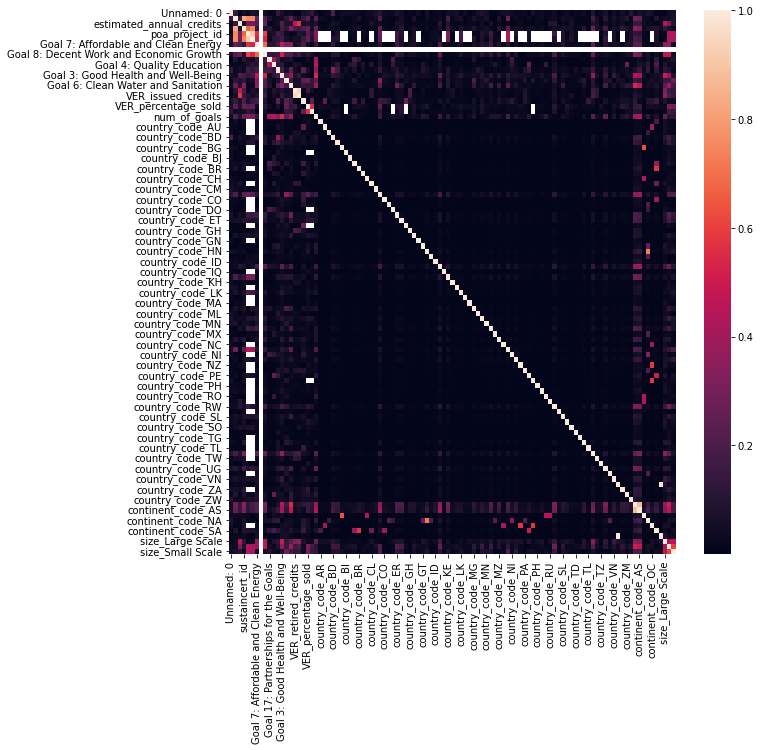

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr().abs())
#Most variables are not heavily correlated with each other, those that are will be explored in model fitting.
